# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | claremont
Processing Record 3 of Set 1 | songea
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | kirakira
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | la sarre
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | fada n'gourma
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | college
Processing Record 22 of S

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-0.56,91,100,2.10,GS,1722024510
1,claremont,34.0967,-117.7198,37.94,36,0,5.66,US,1722024488
2,songea,-10.6833,35.6500,13.70,31,0,0.72,TZ,1722024513
3,puerto natales,-51.7236,-72.4875,3.25,75,75,4.63,CL,1722024514
4,bilibino,68.0546,166.4372,3.48,72,100,2.27,RU,1722024515


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

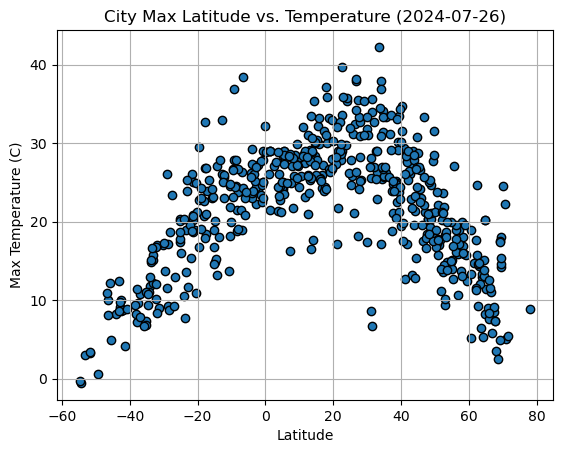

In [24]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-07-26)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

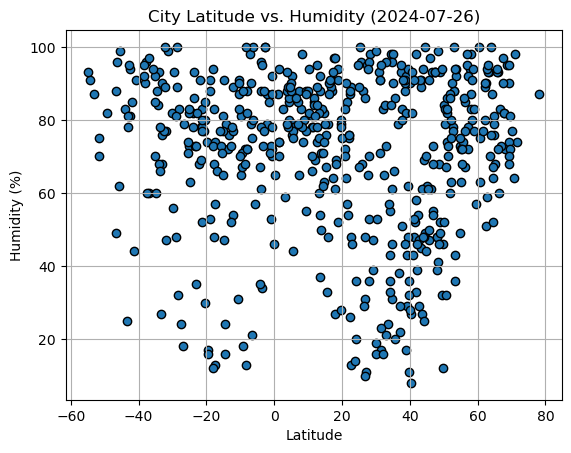

In [27]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity (2024-07-26)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

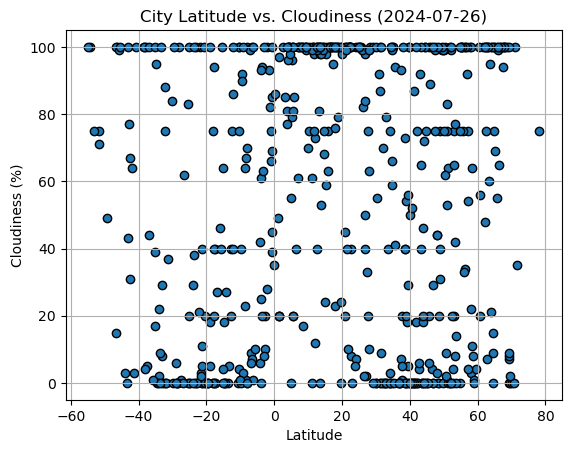

In [31]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (2024-07-26)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

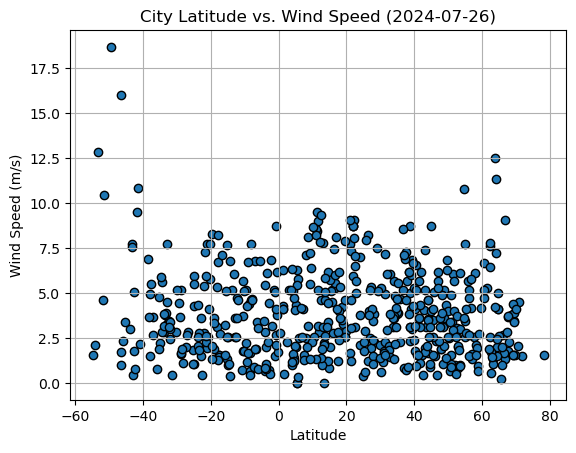

In [35]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed (2024-07-26)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE